# Q-Learning vs SARSA

The following is an empirical comparison between SARSA and Q-Learning, exactly as described in [Sutton and Barro’s Introduction to Reinforcement Learning](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf).

In [19]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep

In [20]:
np.random.seed(0)

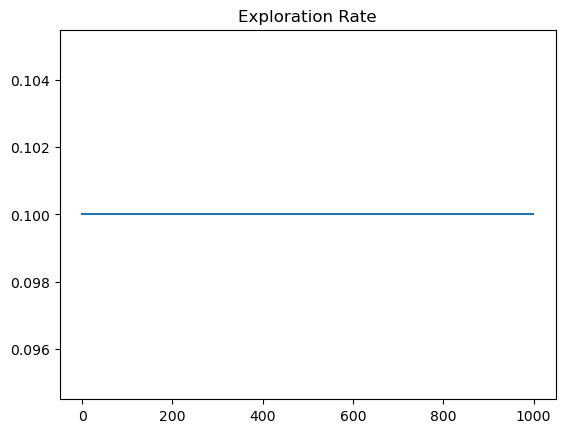

In [21]:
# Parameters

alpha = 0.1 # learning rate
gamma = 1 # discount rate

def epsilon(episode):
    """
    Returns the exploration rate given the episode number
    """
    max, min, decay_rate = 0.1, 0.1, 0
    return min + (max-min) * np.exp(-decay_rate*episode)

num_episodes = 1000
max_steps = 300 # maximum number of steps per episode

plt.plot([epsilon(i) for i in range(num_episodes)]);
plt.title('Exploration Rate');

In [22]:
# Setting-up Environment and Q-Table

env = gym.make('CliffWalking-v0')

num_states = env.observation_space.n
num_actions = env.action_space.n

In [23]:
def play_game(env, Q, max_steps=100):
    """
    Renders policy once on environment. Watch your agent play!

    Parameters
    ----------
    env: gym.core.Environment
        Environment to play on. Must have nS, nA, and P as
        attributes.
    Q: Q-table i.e Q[s,a]
    """
    
    episode_reward = 0
    state = env.reset()
    for t in range(max_steps):
        env.render()
        sleep(0.3)
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            break
        clear_output(wait=True)
    env.render()
    if done:
        print(f'Episode reward: {episode_reward}')
    else:
        print(f'Agent did not reach a terminal state in {max_steps} steps')

## Q-Learning

In [24]:
all_rewards_Q = []

Q = np.zeros((num_states, num_actions)) # initialize Q(s,a) arbitrarily

for episode in range(num_episodes):
    
    episode_reward = 0 # total reward for the current episode
    state = env.reset()
    
    for step in range(max_steps):
        
        if np.random.uniform(0, 1) < epsilon(episode):
            action = env.action_space.sample() # random action
        else:
            action = np.argmax(Q[state,:]) # greedy action
        
        next_state, reward, done, info = env.step(action)
        
        Q[state, action] = Q[state, action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state, action])
        
        state = next_state
        episode_reward += reward
        
        if done:
            break
        
    all_rewards_Q.append(episode_reward)

In [25]:
play_game(env, Q)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Episode reward: -13


## SARSA

In [26]:
all_rewards_SARSA = []

Q_SARSA = np.zeros((num_states, num_actions)) # initialize Q(s,a) arbitrarily

for episode in range(num_episodes):
    
    episode_reward = 0 # total reward for the current episode
    state = env.reset()
    
    if np.random.uniform(0, 1) < epsilon(episode):
        action = env.action_space.sample() # random action
    else:
        action = np.argmax(Q_SARSA[state,:]) # greedy action
    
    for step in range(max_steps):
        
        next_state, reward, done, info = env.step(action)
        
        if np.random.uniform(0, 1) < epsilon(episode):
            next_action = env.action_space.sample() # random action
        else:
            next_action = np.argmax(Q_SARSA[state,:]) # greedy action
        
        Q_SARSA[state, action] = Q_SARSA[state, action] + alpha*(reward + gamma*Q_SARSA[next_state, next_action] - Q_SARSA[state, action])
        
        state = next_state
        action = next_action
        episode_reward += reward
        
        if done:
            break
        
    all_rewards_SARSA.append(episode_reward)

In [27]:
play_game(env, Q_SARSA)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Episode reward: -17


## Comparison

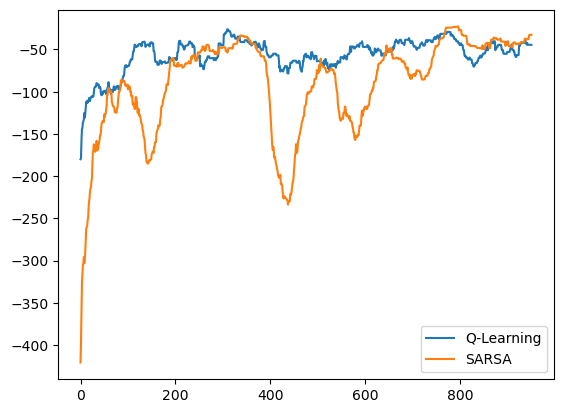

In [28]:
def moving_average(array, n=100):
    """
    Returns the moving average of an array over a window of size n.
    """
    return np.convolve(array, np.ones(n), 'valid')/n

plt.plot(moving_average(all_rewards_Q, 50), label='Q-Learning');
plt.plot(moving_average(all_rewards_SARSA, 50), label='SARSA');
plt.legend();